In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import itertools
from sklearn.externals.six import StringIO
from sklearn.svm import SVC
from xgboost import XGBClassifier
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus

In [228]:
df = pd.read_csv('nba_games_stats.csv')

## EDA and Cleaning

In [3]:
df.shape

(9840, 41)

In [4]:
df.describe()

,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,11960.157012,41.500000,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,18654.867508,23.670804,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,2537.750000,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,5141.500000,41.500000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,7715.250000,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82119.000000,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [5]:
df.tail()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
9835,78119,WAS,78,2018-04-03,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,2018-04-05,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,2018-04-06,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,2018-04-10,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18
9839,82119,WAS,82,2018-04-11,Away,ORL,L,92,101,33,...,22,27,0.815,6,42,20,6,7,16,27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

In [7]:
df.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

In [8]:
df.corr()

,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
Unnamed: 0,1.000000,0.324239,0.109969,0.095388,0.120479,0.092450,0.064266,0.116695,0.159976,0.011902,...,-0.030122,-0.044625,0.030407,-0.047162,-0.004159,0.045921,-0.012058,-0.001177,-0.018346,-0.042104
Game,0.324239,1.000000,0.059389,0.061245,0.078181,0.058137,0.044019,0.044623,0.052515,0.011959,...,-0.035976,-0.035012,-0.001151,0.002942,0.019189,0.084962,-0.007983,-0.016545,-0.081390,-0.091161
TeamPoints,0.109969,0.059389,1.000000,0.360526,0.836203,0.284428,0.710187,0.518022,0.265727,0.477539,...,0.196832,0.192497,0.029329,0.017356,-0.277404,0.116507,-0.091221,-0.153516,0.038266,0.217472
OpponentPoints,0.095388,0.061245,0.360526,1.000000,0.269846,0.278018,0.098300,0.138392,0.158751,0.034548,...,0.318523,0.267833,0.175700,-0.011585,0.093312,0.574607,0.102418,0.056991,-0.115901,0.151177
FieldGoals,0.120479,0.078181,0.836203,0.269846,1.000000,0.441729,0.777024,0.329092,0.109583,0.363237,...,0.113287,0.105879,0.024164,0.005993,-0.261143,0.104001,-0.103220,-0.142266,0.036841,-0.133546
FieldGoalsAttempted,0.092450,0.058137,0.284428,0.278018,0.441729,1.000000,-0.216425,0.091678,0.263961,-0.136795,...,0.136452,0.138041,0.017233,-0.044799,0.320054,0.155268,-0.175984,0.258940,0.134820,-0.136791
FieldGoals.,0.064266,0.044019,0.710187,0.098300,0.777024,-0.216425,1.000000,0.293077,-0.066197,0.493585,...,0.029185,0.020658,0.013527,0.038295,-0.506287,0.003510,0.009620,-0.333857,-0.054332,-0.047338
X3PointShots,0.116695,0.044623,0.518022,0.138392,0.329092,0.091678,0.293077,1.000000,0.747013,0.685878,...,0.042949,0.040671,0.004444,-0.032134,-0.096056,0.043603,-0.008035,-0.128773,-0.035222,-0.101793
X3PointShotsAttempted,0.159976,0.052515,0.265727,0.158751,0.109583,0.263961,-0.066197,0.747013,1.000000,0.068394,...,0.053237,0.051995,0.008472,-0.054321,0.123637,0.075047,0.001993,-0.083209,0.029536,-0.071186
X3PointShots.,0.011902,0.011959,0.477539,0.034548,0.363237,-0.136795,0.493585,0.685878,0.068394,1.000000,...,0.013225,0.011773,-0.002838,0.011654,-0.262272,-0.020319,-0.011480,-0.107660,-0.073106,-0.074101


In [9]:
#dropping opponent stats as I want to base my model on one team's stats
dft = df.drop(['Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'], axis = 1)

In [10]:
dft.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,9,17,0.529,10,42,26,6,8,17,24
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,25,33,0.758,3,37,26,10,6,12,20
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,8,11,0.727,10,37,26,14,5,13,25
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,26,0.769,7,38,28,8,3,19,33
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,28,36,0.778,12,41,18,10,5,8,17


In [11]:
dft = dft.drop(['Unnamed: 0', 'OpponentPoints'], axis=1)

In [12]:
dft.corr()

,Game,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls
Game,1.000000,0.059389,0.078181,0.058137,0.044019,0.044623,0.052515,0.011959,-0.037187,-0.036595,-0.000459,0.002806,0.017693,0.082710,-0.009256,-0.017147,-0.080715,-0.089735
TeamPoints,0.059389,1.000000,0.836203,0.284428,0.710187,0.518022,0.265727,0.477539,0.318523,0.267833,0.175700,-0.011585,0.093312,0.574607,0.102418,0.056991,-0.115901,0.151177
FieldGoals,0.078181,0.836203,1.000000,0.441729,0.777024,0.329092,0.109583,0.363237,-0.175325,-0.185503,0.004876,-0.000923,0.080150,0.637564,0.097681,0.062316,-0.151886,0.051371
FieldGoalsAttempted,0.058137,0.284428,0.441729,1.000000,-0.216425,0.091678,0.263961,-0.136795,-0.217743,-0.217224,-0.036973,0.509138,0.424753,0.196857,0.121444,0.037162,-0.276904,0.074338
FieldGoals.,0.044019,0.710187,0.777024,-0.216425,1.000000,0.293077,-0.066197,0.493585,-0.035912,-0.047040,0.030727,-0.353501,-0.206529,0.554593,0.020817,0.041642,0.027613,0.006092
X3PointShots,0.044623,0.518022,0.329092,0.091678,0.293077,1.000000,0.747013,0.685878,-0.099134,-0.115349,0.027792,-0.123974,-0.013439,0.419289,0.008089,-0.002103,-0.005752,0.033058
X3PointShotsAttempted,0.052515,0.265727,0.109583,0.263961,-0.066197,0.747013,1.000000,0.068394,-0.091881,-0.099366,0.007242,0.016708,0.090278,0.226847,0.046612,-0.005608,-0.012005,0.047430
X3PointShots.,0.011959,0.477539,0.363237,-0.136795,0.493585,0.685878,0.068394,1.000000,-0.050268,-0.066249,0.032668,-0.201343,-0.115364,0.374811,-0.029048,0.000760,0.005081,0.005355
FreeThrows,-0.037187,0.318523,-0.175325,-0.217743,-0.035912,-0.099134,-0.091881,-0.050268,1.000000,0.923855,0.331921,0.052336,0.063195,-0.153130,0.039400,0.012540,0.022667,0.201047
FreeThrowsAttempted,-0.036595,0.267833,-0.185503,-0.217224,-0.047040,-0.115349,-0.099366,-0.066249,0.923855,1.000000,-0.029283,0.092457,0.091154,-0.166925,0.051204,0.015715,0.027632,0.213832


In [13]:
#looking at unique team names as I may be merging with another DF(using different team names) later
dft.Team.unique()

array(['ATL', 'BOS', 'BRK', 'CHO', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [14]:
#Creating dummy variable for home/away
dft = pd.get_dummies(dft, prefix = ['Home'], columns = ['Home'], drop_first=True)

In [60]:
dft.head()

,Team,Game,Date,Opponent,WINorLOSS,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,...,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home
0,ATL,1,2014-10-29,TOR,L,102,40,80,0.500,13,...,17,0.529,10,42,26,6,8,17,24,0
1,ATL,2,2014-11-01,IND,W,102,35,69,0.507,7,...,33,0.758,3,37,26,10,6,12,20,1
2,ATL,3,2014-11-05,SAS,L,92,38,92,0.413,8,...,11,0.727,10,37,26,14,5,13,25,0
3,ATL,4,2014-11-07,CHO,L,119,43,93,0.462,13,...,26,0.769,7,38,28,8,3,19,33,0
4,ATL,5,2014-11-08,NYK,W,103,33,81,0.407,9,...,36,0.778,12,41,18,10,5,8,17,1


In [16]:
#creating dataframe without categorical data to make initial model
imdf = dft.drop(['Team', 'Game', 'Date', 'Opponent'], axis=1)

In [17]:
imdf.head()

,WINorLOSS,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home
0,L,102,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,0
1,W,102,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,1
2,L,92,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,0
3,L,119,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,0
4,W,103,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,1


In [19]:
#creating dummy variable for WINorLOSS which is target variable.
imdf = pd.get_dummies(imdf, prefix = ['WINorLOSS'], columns = ['WINorLOSS'], drop_first=True)

In [20]:
imdf.head()

,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home,WINorLOSS_W
0,102,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,0,0
1,102,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,1,1
2,92,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,0,0
3,119,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,0,0
4,103,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,1,1


In [34]:
imdf.WINorLOSS_W.value_counts()

1    4920
0    4920
Name: WINorLOSS_W, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22882f60>,
      dtype=object)

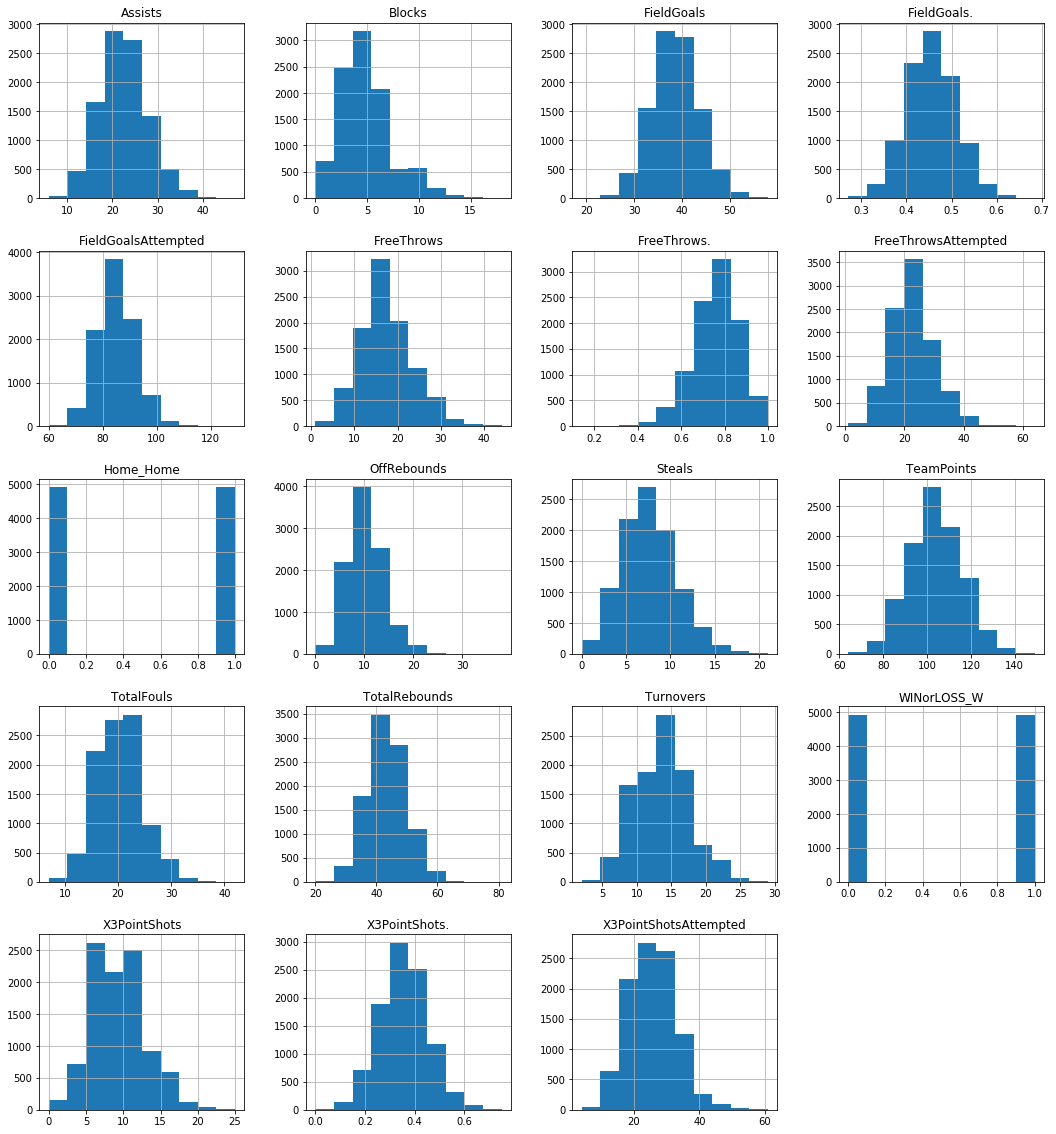

In [66]:
#checking distributions of all remaining features
feat = imdf.iloc[:, 0:19]
feat.hist(figsize=(18, 20))

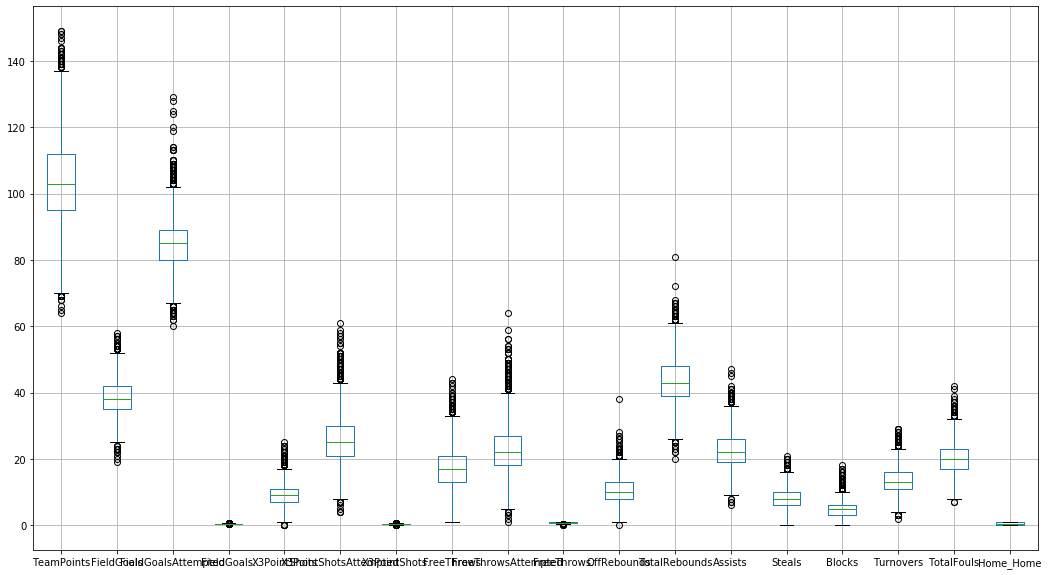

In [63]:
feat.boxplot(figsize=(18,10));

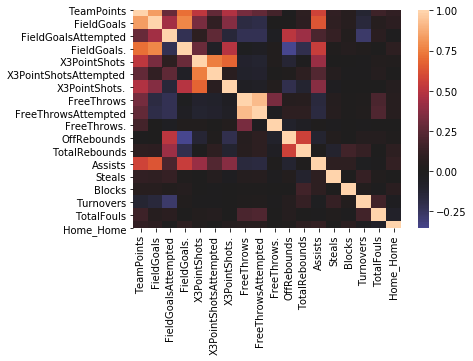

In [29]:
sns.heatmap(feat.corr(), center=0);

In [52]:
imdf1 = imdf.drop(['FieldGoals', 'FreeThrowsAttempted', 'X3PointShotsAttempted'], axis=1)

In [65]:
#removing OffRebounds as it is highly correlated with Total Rebounds
bsdf = imdf1.drop(['OffRebounds'], axis=1)

In [167]:
bsdf1 = imdf1.drop(['OffRebounds'], axis=1)

## Functions

In [278]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This faunction prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Creating Baseline Dummy Classifier

In [78]:
#Score is .5 as there are an even number of wins and losses in the dataset.
from sklearn.dummy import DummyClassifier
X = bsdf.drop(columns=['WINorLOSS_W'], axis=1)
y = bsdf['WINorLOSS_W']
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.5

## Initial Logistic Regression model 

In [122]:
#setting up variables for initial modeling
y = imdf['WINorLOSS_W']
X = imdf.drop(columns=['WINorLOSS_W'], axis=1)

In [121]:
#setting up training using 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [123]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [114]:
y_hat_test.shape

(2460,)

In [125]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      6232
1       597
255     551
Name: WINorLOSS_W, dtype: int64
------------------------------------
0      0.844444
1      0.080894
255    0.074661
Name: WINorLOSS_W, dtype: float64


In [126]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      2093
1       198
255     169
Name: WINorLOSS_W, dtype: int64
------------------------------------
0      0.850813
1      0.080488
255    0.068699
Name: WINorLOSS_W, dtype: float64


In [131]:
confusion_matrix = confusion_matrix(y_test, y_hat_test)
print(confusion_matrix)

[[1033  169]
 [ 198 1060]]


In [128]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [129]:
logreg.coef_

array([[ 1.89650703e-01,  1.25725336e-01, -3.93802013e-01,
        -8.95804498e+00, -2.12445751e-02, -2.20046738e-02,
         2.26911739e+00, -4.05553952e-02, -8.45280893e-02,
         1.24265580e+00, -4.07904644e-03,  3.65523615e-01,
         2.91010075e-02,  3.88699771e-01,  1.17171035e-01,
        -3.22883325e-01, -6.16861057e-02,  3.81458077e-01]])

## Scaling Features

In [168]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
bsdf1[['TeamPoints', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots',
       'X3PointShots.', 'FreeThrows', 'FreeThrows.', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls']] = scale.fit_transform(bsdf1[['TeamPoints', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots',
       'X3PointShots.', 'FreeThrows', 'FreeThrows.', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls']])

In [169]:
bsdf1.head()

,TeamPoints,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShots.,FreeThrows,FreeThrows.,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home,WINorLOSS_W
0,-0.135577,-0.687610,0.809949,1.076508,2.420590,-1.386237,-2.237904,-0.237224,0.674144,-0.591641,1.250577,0.868721,0.912927,0,0
1,-0.135577,-2.230456,0.937901,-0.591131,-0.044195,1.279401,-0.042141,-1.017243,0.674144,0.760288,0.462156,-0.423487,-0.013558,1,1
2,-0.956095,0.995495,-0.780313,-0.313191,-0.351014,-1.552839,-0.339384,-1.017243,0.674144,2.112217,0.067945,-0.165045,1.144548,0,0
3,1.259303,1.135754,0.115352,1.076508,0.405807,0.446389,0.063333,-0.861239,1.064561,0.084324,-0.720476,1.385604,2.997519,0,0
4,-0.053525,-0.547351,-0.889986,-0.035251,0.559217,1.779208,0.149629,-0.393228,-0.887524,0.760288,0.067945,-1.457253,-0.708422,1,1


## New LogReg Model with updated/scaled features

In [170]:
y = bsdf1['WINorLOSS_W']
X = bsdf1.drop(columns=['WINorLOSS_W'], axis=1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [172]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [174]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      6230
255     601
1       549
Name: WINorLOSS_W, dtype: int64
------------------------------------
0      0.844173
255    0.081436
1      0.074390
Name: WINorLOSS_W, dtype: float64


In [175]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0      2083
1       193
255     184
Name: WINorLOSS_W, dtype: int64
------------------------------------
0      0.846748
1      0.078455
255    0.074797
Name: WINorLOSS_W, dtype: float64


Train AUC: 0.9278861394035951
Test AUC: 0.925966658642591


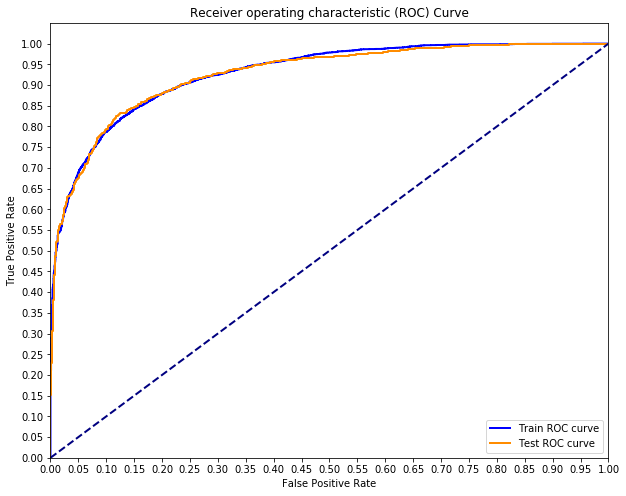

In [224]:
#Plotting ROC Curve
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds)
classes = ['Win','Loss']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

## PCA Evaluation

In [134]:
feat1 = imdf1.iloc[:, 0:16]

In [135]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=6)
pca_2 = PCA(n_components=11)
pca_3 = PCA(n_components=16)

principalComponents = pca_1.fit_transform(feat1)
principalComponents = pca_2.fit_transform(feat1)
principalComponents = pca_3.fit_transform(feat1)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(feat1)
print(np.sum(pca.explained_variance_ratio_))

0.9024570130229974
0.9990025697977762
1.0
0.984164812690074


In [ ]:
#PCA unneccesary due to relatively small # of features

## KNN 

In [302]:
bsdf1.columns

Index(['TeamPoints', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots',
       'X3PointShots.', 'FreeThrows', 'FreeThrows.', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls', 'Home_Home',
       'WINorLOSS_W'],
      dtype='object')

In [176]:
y = bsdf1['WINorLOSS_W']
X = bsdf1.drop(columns=['WINorLOSS_W'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [177]:
#Setting up KNN test
from sklearn.neighbors import KNeighborsClassifier

kclf = KNeighborsClassifier()

kclf.fit(X_train, y_train)

test_preds = kclf.predict(X_test)

In [178]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7853736089030207
Recall Score: 0.7853736089030207
Accuracy Score: 0.7804878048780488
F1 Score: 0.7853736089030208


In [296]:
#creating function to find best K value
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 25
F1-Score: 0.8085449415558241


In [ ]:
#Using k = 25 improved model performance by ~2.5%

In [297]:
#rerunning with best k
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

test_preds = knn.predict(X_test)

print_metrics(y_test, test_preds)

Precision Score: 0.8201144726083401
Recall Score: 0.7972972972972973
Accuracy Score: 0.806910569105691
F1 Score: 0.8085449415558241


In [299]:
print(confusion_matrix(y_test,test_preds))  
print(classification_report(y_test,test_preds)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, test_preds)))

[[ 982  220]
 [ 255 1003]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1202
           1       0.82      0.80      0.81      1258

    accuracy                           0.81      2460
   macro avg       0.81      0.81      0.81      2460
weighted avg       0.81      0.81      0.81      2460

The accuracy score is 0.806910569105691


[[ 982  220]
 [ 255 1003]]


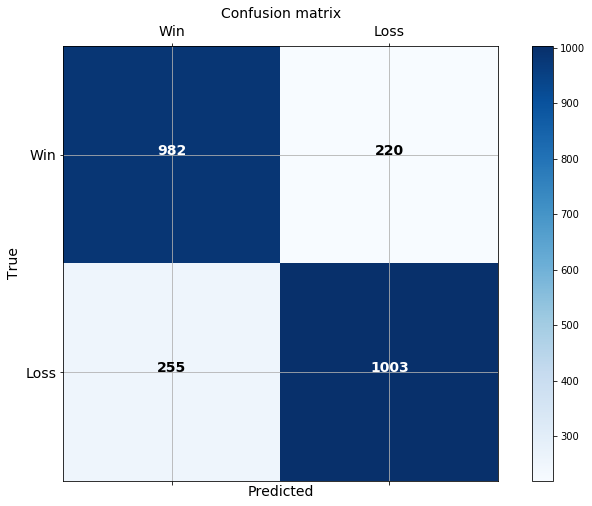

In [300]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds)
classes = ['Win','Loss']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

## Decision Tree

In [202]:
#setting up decision tree
classifier = DecisionTreeClassifier(max_depth=6)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [203]:
y_pred = classifier.predict(X_test)  

In [204]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create Confusion Matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :73.00813008130082

AUC is :0.73

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,893,309,1202
1,355,903,1258
All,1248,1212,2460


In [205]:
classifier.feature_importances_

array([0.46457248, 0.06055598, 0.16658446, 0.00340097, 0.        ,
       0.00472407, 0.        , 0.201606  , 0.00233334, 0.0315329 ,
       0.00126543, 0.03753128, 0.02589308, 0.        ])

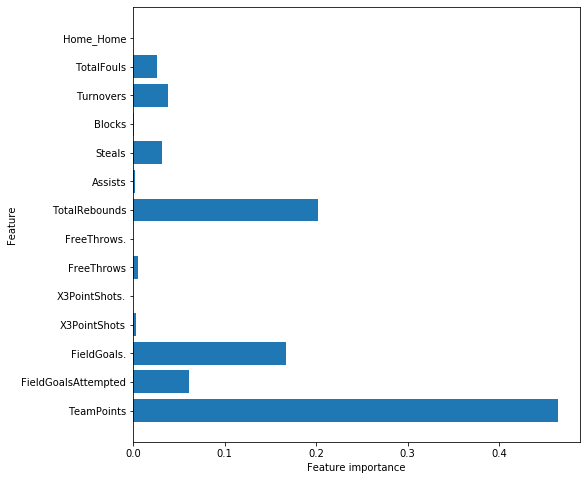

In [206]:
# Function to view feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances(classifier)

In [207]:
# Create Confusion Matrix and Classification Report
pred = classifier.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[893 309]
 [355 903]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1202
           1       0.75      0.72      0.73      1258

    accuracy                           0.73      2460
   macro avg       0.73      0.73      0.73      2460
weighted avg       0.73      0.73      0.73      2460



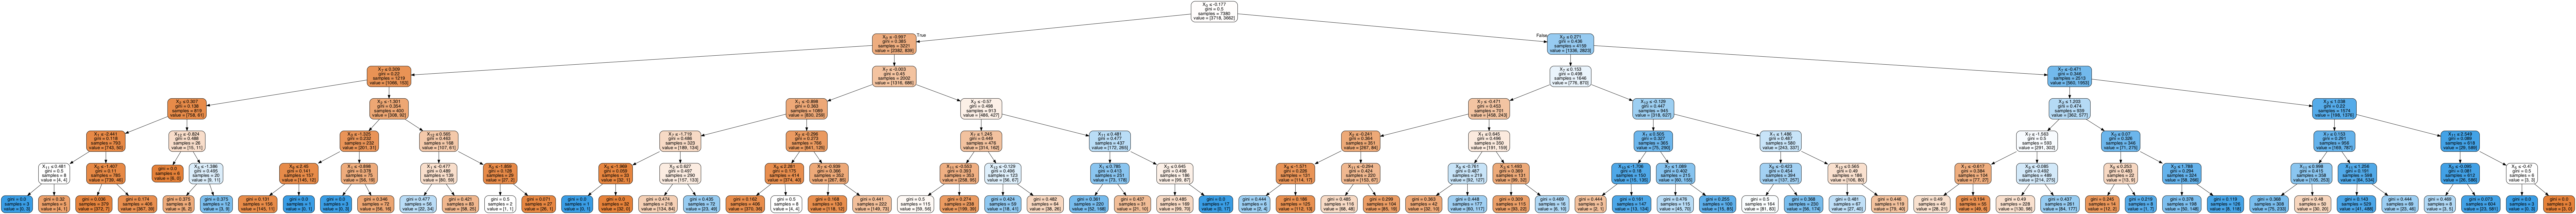

In [208]:
#Graphing decision tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                rounded=True, filled=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Grid Search for Decision Tree

In [187]:
clf = DecisionTreeClassifier()

#Set up parameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [188]:
dt_grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)

dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [189]:
# Find mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Find mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 78.02%
Mean Test Score: 72.93%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
# ~6% increas in the training score with Grid Search, will rerun original tree with new params

## Bagged Trees

In [193]:
#Set up bagging classifier
bagtree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=6), 
                                 n_estimators=20)

In [195]:
#Fit training data
bagtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=6,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [196]:
#check training data accuracy
bagtree.score(X_train, y_train)

0.8245257452574526

In [197]:
#check test data accuracy
bagtree.score(X_test, y_test)

0.765040650406504

## Random Forest

In [252]:
#setting up random forest
forest = RandomForestClassifier(n_estimators=100, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [253]:
#checking scores
forest.score(X_train, y_train)

0.9330623306233062

In [254]:
forest.score(X_test, y_test)

0.7845528455284553

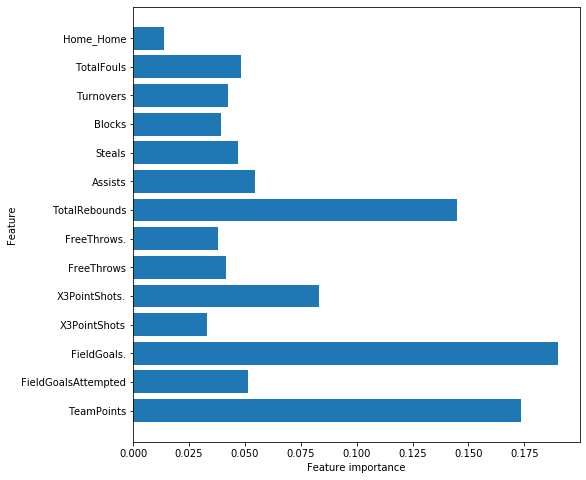

In [247]:
plot_feature_importances(forest)

In [248]:
print(forest.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## XGBoost

In [257]:
#Setting up xgboost
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 85.83%
Validation accuracy: 81.54%


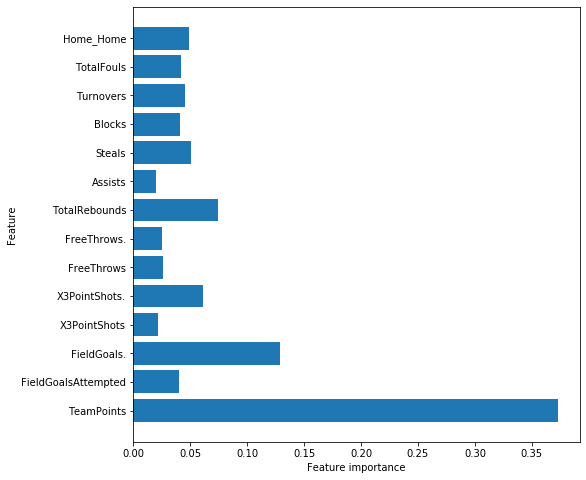

In [258]:
plot_feature_importances(xgb)

## SVM

In [265]:
#setting up SVM
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [263]:
svm.coef_

array([[ 1.08800362, -1.39103298,  0.51176931, -0.04159123,  0.27282337,
        -0.31990996,  0.2612809 ,  1.68432846,  0.10690358,  0.80770768,
         0.20547107, -0.89998496, -0.20755053,  0.21802084]])

In [266]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[1020  182]
 [ 221 1037]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1202
           1       0.85      0.82      0.84      1258

    accuracy                           0.84      2460
   macro avg       0.84      0.84      0.84      2460
weighted avg       0.84      0.84      0.84      2460

The accuracy score is 0.8361788617886179


In [285]:
#trying to boost accuracy by tuning parameters
svm1 = SVC(kernel='linear', gamma='auto')
svm1.fit(X_train, y_train)
y_pred = svm1.predict(X_test)

In [286]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[1038  164]
 [ 207 1051]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1202
           1       0.87      0.84      0.85      1258

    accuracy                           0.85      2460
   macro avg       0.85      0.85      0.85      2460
weighted avg       0.85      0.85      0.85      2460

The accuracy score is 0.8491869918699188


In [287]:
svm2 = SVC(kernel='sigmoid', gamma='auto')
svm2.fit(X_train, y_train)
y_pred1 = svm2.predict(X_test)

In [288]:
print(confusion_matrix(y_test,y_pred1))  
print(classification_report(y_test,y_pred1)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred1)))

[[901 301]
 [325 933]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1202
           1       0.76      0.74      0.75      1258

    accuracy                           0.75      2460
   macro avg       0.75      0.75      0.75      2460
weighted avg       0.75      0.75      0.75      2460

The accuracy score is 0.7455284552845528


## Best SVM Model

In [289]:
svm1 = SVC(kernel='linear', gamma='auto')
svm1.fit(X_train, y_train)
y_pred = svm1.predict(X_test)

In [290]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[1038  164]
 [ 207 1051]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1202
           1       0.87      0.84      0.85      1258

    accuracy                           0.85      2460
   macro avg       0.85      0.85      0.85      2460
weighted avg       0.85      0.85      0.85      2460

The accuracy score is 0.8491869918699188


[[1038  164]
 [ 207 1051]]


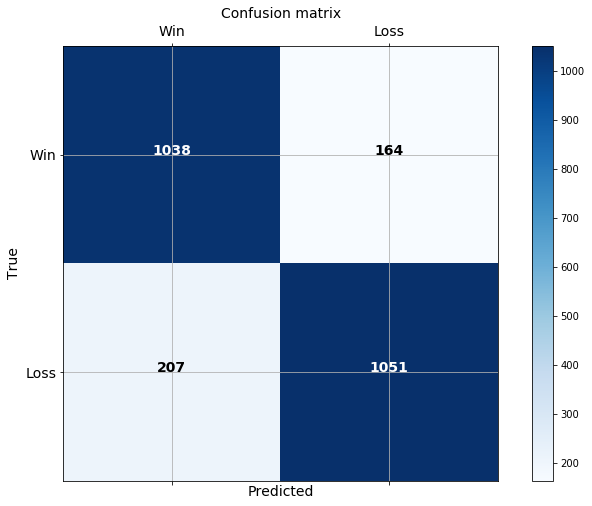

In [292]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classes = ['Win','Loss']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

Confusion Matrix, without normalization
[[1038  164]
 [ 207 1051]]


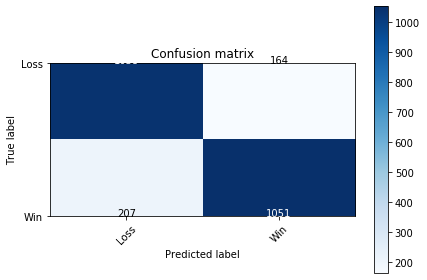

In [291]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Loss', 'Win']
plot_confusion_matrix(cm, classes)

## Adaboost

In [274]:
#setting up adaboost
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [284]:
#creating confusion matrix
adaboost_train_preds = adb.predict(X_train)
adaboost_test_preds = adb.predict(X_test)

adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix


array([[ 982,  220],
       [ 220, 1038]])